### Balance Sheet Key Items for Company Stock Analysis

	1.	Earnings Per Share (EPS): Key profitability measure.
	2.	Net Debt: Financial leverage and risk assessment.
	3.	Working Capital: Short-term liquidity and operational efficiency.
	4.	Tangible Book Value: Net worth excluding intangibles.
	5.	Total Debt: Overall debt level.
	6.	Retained Earnings: Reinvestment capacity.
	7.	Common Stock Equity: Book value attributable to common shareholders.
	8.	Total Capitalization: Capital structure analysis.
	9.	Net PPE: Value
    10.     Total Liabilities Net Minority Interest
    11.     Stockholders Equity
    12.     Totla Assets
  

### Cash Flow Statement Key Items for Company Stock Analysis

	1.	Free Cash Flow (FCF): Indicates cash available for dividends, debt repayment, and reinvestment.
	2.	Capital Expenditure (CapEx): Reflects investment in growth and long-term assets.
	3.	Operating Cash Flow: Shows cash generated from core operations.
	4.	Net Income From Continuing Operations: Measures profitability from core activities.
	5.	Changes In Working Capital: Affects liquidity and operational efficiency.
	6.	Cash Flow From Continuing Operating Activities: Indicates sustainable cash flow from operations.
	7.	Repayment Of Debt: Impacts financial leverage and liquidity.
	8.	Issuance Of Debt: Affects financial leverage and liquidity.
	9.	Repurchase Of Capital Stock: Influences share count and potentially EPS.
	10.	Net Business Purchase And Sale: Reflects strategic growth or divestment activities.

### Income Statement Key Items for Company Stock Analysis

	1.	EBITDA: Measures operating performance and profitability before non-operating expenses.
	2.	Net Income: Total profit or loss after all expenses, providing an overall measure of profitability.
	3.	Operating Income: Profit from core business operations, reflecting operational efficiency.
	4.	Gross Profit: Revenue minus cost of goods sold, indicating core profitability.
	5.	Normalized EBITDA: Adjusted EBITDA for unusual items, offering a clearer view of operational performance.
	6.	Basic EPS and Diluted EPS: Measures of earnings per share, reflecting shareholder returns.
	7.	Total Revenue: Indicates overall business activity and growth.
	8.	Operating Expense: Costs associated with running core operations, affecting profitability.
	9.	Reconciled Depreciation and Amortization: Adjusted expenses for asset depreciation and amortization.
	10.	Net Income From Continuing Operations: Profitability from ongoing activities, excluding discontinued operations.

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
# Download the ticker object for Philip Morris (PM)
ticker = yf.Ticker("CPNG")

# Balance sheet, cash_flow and income_statement
balance_sheet = ticker.balance_sheet
cash_flow = ticker.cashflow
income_statement = ticker.financials

#### Balance Sheet Key Items

In [4]:
balance_sheet_items = [
    'Treasury Shares Number',
    'Ordinary Shares Number',
    'Total Debt',
    'Working Capital',
    'Tangible Book Value',
    'Net Tangible Assets',
    'Common Stock Equity',
    'Total Capitalization',
    'Stockholders Equity',
    'Retained Earnings',
    'Net PPE',
    'Properties',
    'Total Liabilities Net Minority Interest',
    'Total Assets'
]
##############################################################################################################
#Error Check
# Identify missing items
missing_items = [item for item in balance_sheet_items if item not in balance_sheet.index]

# Add missing items to DataFrame with NaN values
if missing_items:
    for item in missing_items:
        balance_sheet.loc[item] = np.nan

# Explicitly convert to numeric type before filling NaN values
balance_sheet = balance_sheet.apply(pd.to_numeric, errors='coerce')

# Extract and convert the data
extracted_items_bs = balance_sheet.loc[balance_sheet_items].fillna(1) / 1_000_000  # Convert to millions of USD
################################################################################################################

# Extract and convert the data
#extracted_items_bs = balance_sheet.loc[balance_sheet_items] / 1_000_000  # Convert to millions of USD

# Transpose the data for easier comparison
comparison_table_bs = extracted_items_bs.T

# Remove rows with NaN values
cleaned_comparison_bs_df = comparison_table_bs.dropna()

# Convert index to datetime and keep only the year
cleaned_comparison_bs_df.index = pd.to_datetime(cleaned_comparison_bs_df.index).year

# Convert to a DataFrame
comparison_bs_df = pd.DataFrame(cleaned_comparison_bs_df)

### Cash Flow Key Items

In [5]:
cash_flow_items = [
    'Free Cash Flow',
    'Capital Expenditure',
    'Operating Cash Flow',
    'Net Income From Continuing Operations',
    'Change In Working Capital',
    'Cash Flow From Continuing Operating Activities',
    'Repayment Of Debt',
    'Issuance Of Debt',
    'Repurchase Of Capital Stock',
    'Financing Cash Flow', 
    'Cash Flow From Continuing Financing Activities',
    'Net Business Purchase And Sale',
    'Deferred Income Tax'
]

##############################################################################################################
#Error Check
# Identify missing items
missing_items = [item for item in cash_flow_items if item not in cash_flow.index]

# Add missing items to DataFrame with NaN values
if missing_items:
    for item in missing_items:
        cash_flow.loc[item] = np.nan

# Explicitly convert to numeric type before filling NaN values
cash_flow = cash_flow.apply(pd.to_numeric, errors='coerce')

# Extract and convert the data
extracted_items_cf = cash_flow.loc[cash_flow_items].fillna(1) / 1_000_000  # Convert to millions of USD
################################################################################################################

# Extract and convert the data
#extracted_items_cf = cash_flow.loc[cash_flow_items] / 1_000_000  # Convert to millions of USD

# Transpose the data for easier comparison
comparison_table_cf = extracted_items_cf.T

# Remove rows with NaN values
cleaned_comparison_cf_df = comparison_table_cf.dropna()

# Convert index to datetime and keep only the year
cleaned_comparison_cf_df.index = pd.to_datetime(cleaned_comparison_cf_df.index).year

# Convert to a DataFrame
comparison_cf_df = pd.DataFrame(cleaned_comparison_cf_df)

### Income Statement Key Items

In [6]:
income_statement_items = [
    'EBITDA',
    'Net Income',
    'Operating Income',
    'Operating Expense',
    'Interest Expense',
    'Gross Profit',
    'Normalized EBITDA',
    'Basic EPS',
    'Diluted EPS',
    'Total Revenue',
    'Total Expenses',
    'Cost Of Revenue', 
    'Net Income Continuous Operations'
]

# Extract and convert the data
extracted_items_is = income_statement.loc[income_statement_items] / 1_000_000  # Convert to millions of USD

# Transpose the data for easier comparison
comparison_table_is = extracted_items_is.T

# Remove rows with NaN values
cleaned_comparison_is_df = comparison_table_is.dropna()

# Convert index to datetime and keep only the year
cleaned_comparison_is_df.index = pd.to_datetime(cleaned_comparison_is_df.index).year

# Convert to a DataFrame
comparison_is_df = pd.DataFrame(cleaned_comparison_is_df)

In [7]:
result = pd.concat([comparison_bs_df, comparison_cf_df, comparison_is_df], axis=1) 

In [9]:
new_order = [
    'Treasury Shares Number',
    'Ordinary Shares Number',
    'Total Debt',
    'Total Liabilities Net Minority Interest',
    'Total Assets',
    'Working Capital',
    'Stockholders Equity',
    'Total Capitalization',
    'Net Tangible Assets',
    'Tangible Book Value',
    'Retained Earnings',
    'Total Revenue',
    'Cost Of Revenue',
    'Gross Profit',
    'Operating Expense',
    'Interest Expense',
    'Total Expenses',
    'Normalized EBITDA',
    'Basic EPS',
    'Diluted EPS',
    'Net Income Continuous Operations'
]
result = result[new_order].dropna()
result

,Treasury Shares Number,Ordinary Shares Number,Total Debt,Total Liabilities Net Minority Interest,Total Assets,Working Capital,Stockholders Equity,Total Capitalization,Net Tangible Assets,Tangible Book Value,...,Total Revenue,Cost Of Revenue,Gross Profit,Operating Expense,Interest Expense,Total Expenses,Normalized EBITDA,Basic EPS,Diluted EPS,Net Income Continuous Operations
2023,0.000001,1790.328801,2787.000,9257.000,13346.000,947.000,4089.000,4618.000,4089.000,4089.000,...,24383.0,18193.0,6190.0,5717.0,48.0,23910.0,907.0,0.000001,0.000001,1360.0
2022,0.000001,1772.607364,2402.000,7099.000,9513.000,767.000,2414.000,2952.000,2414.000,2414.000,...,20583.0,15873.0,4710.0,4822.0,27.0,20695.0,165.0,-0.0,-0.0,-92.0
2021,0.000001,1754.202657,2121.061,6465.877,8641.834,892.518,2175.957,2459.147,2175.957,2175.957,...,18406.0,15455.0,2951.0,4445.0,45.0,19900.0,-1296.0,-0.000001,-0.000001,-1543.0
2020,0.000001,1706.714142,2234.120,9136.194,5067.332,-891.996,-4068.862,-3125.669,-4073.109,-4073.109,...,11967.339,9981.102,1986.237,2502.231,107.762,12483.333,-379.856,-0.0,-0.0,-463.157


Text(0, 0.5, 'Amount')

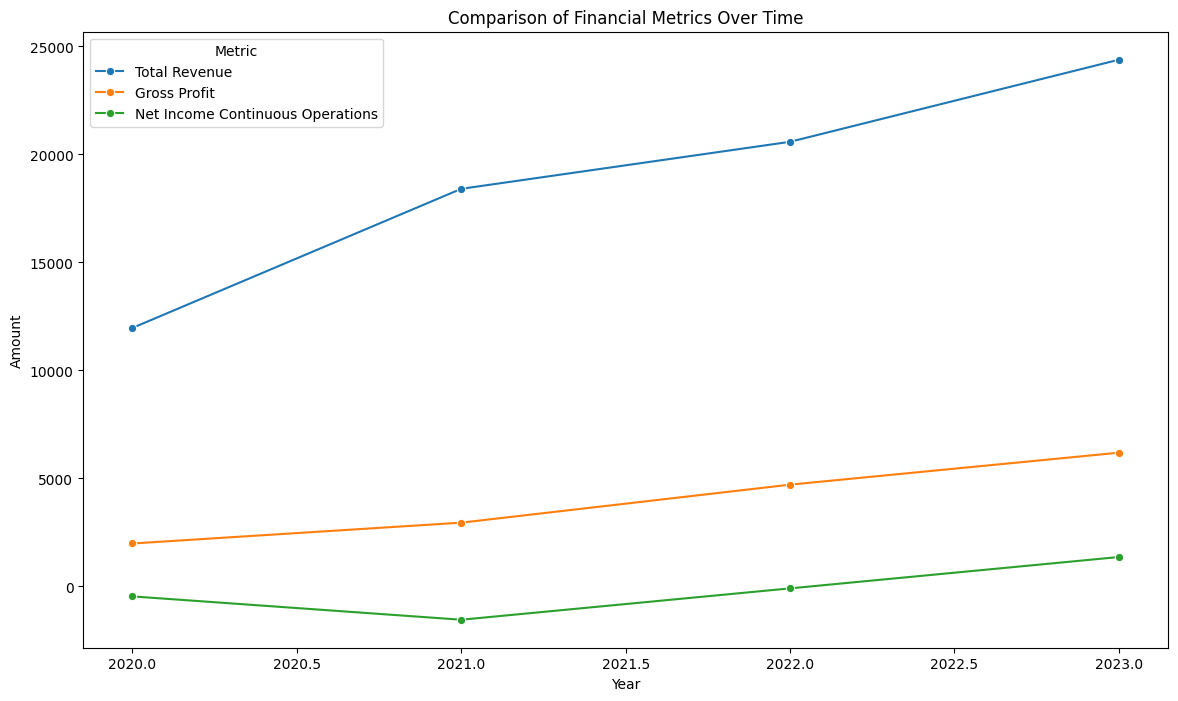

In [10]:
melted_df = result.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')
melted_df.rename(columns={'index': 'Year'}, inplace=True)

# Line plot for selected metrics
plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_df[melted_df['Metric'].isin(['Net Income Continuous Operations', 'Gross Profit', 'Total Revenue'])],
             x='Year', y='Value', hue='Metric', marker='o')
plt.title('Comparison of Financial Metrics Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

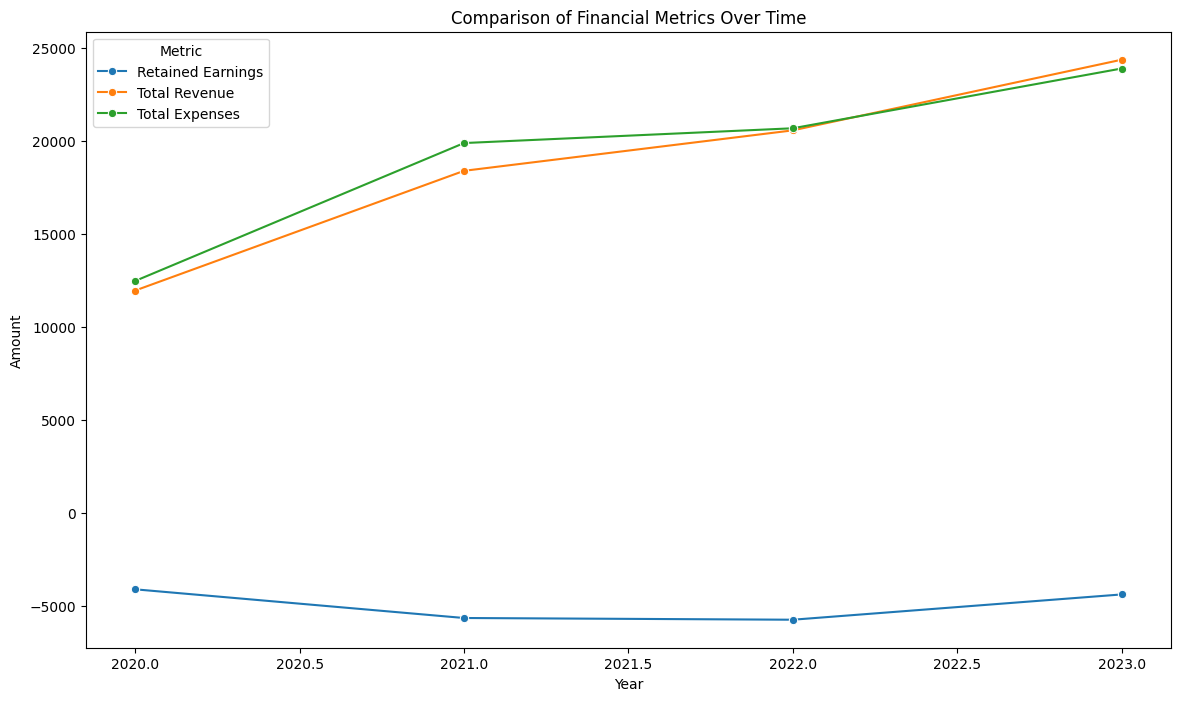

In [11]:
melted_df = result.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')
melted_df.rename(columns={'index': 'Year'}, inplace=True)

# Line plot for selected metrics
plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_df[melted_df['Metric'].isin(['Total Revenue', 'Retained Earnings', 'Total Expenses'])],
             x='Year', y='Value', hue='Metric', marker='o')
plt.title('Comparison of Financial Metrics Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')

Text(0, 0.5, 'Amount')

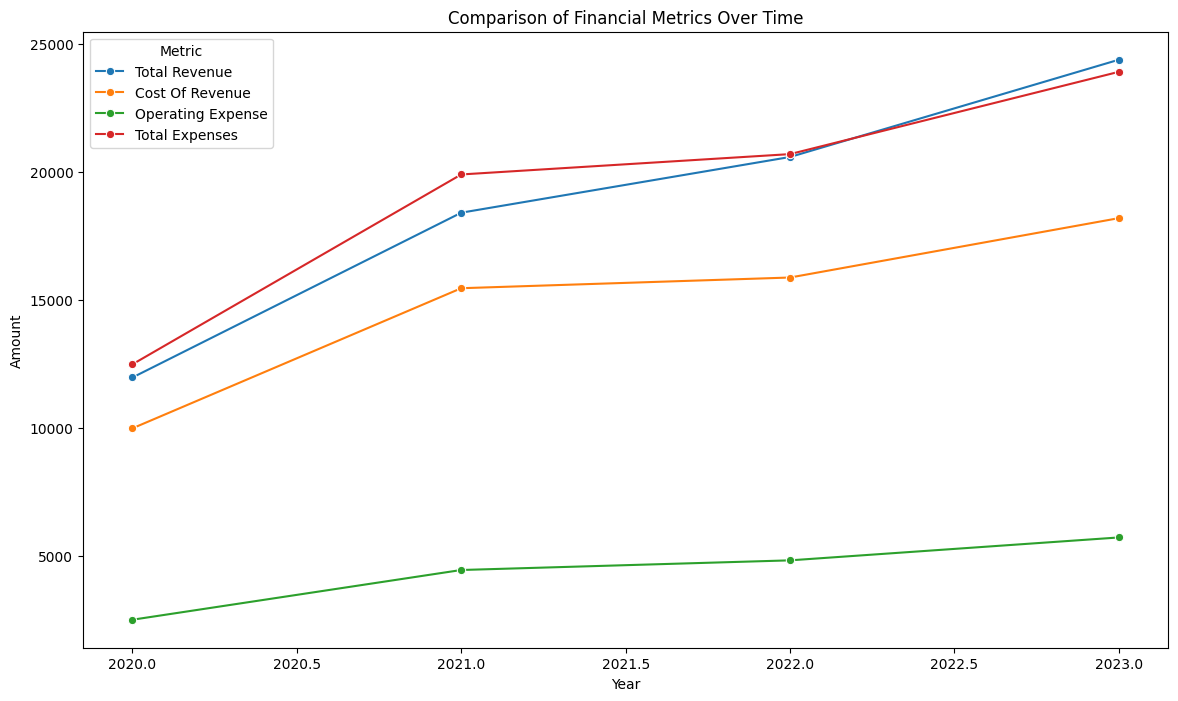

In [12]:
melted_df = result.reset_index().melt(id_vars='index', var_name='Metric', value_name='Value')
melted_df.rename(columns={'index': 'Year'}, inplace=True)

# Line plot for selected metrics
plt.figure(figsize=(14, 8))
sns.lineplot(data=melted_df[melted_df['Metric'].isin(['Total Revenue', 'Cost Of Revenue', 'Operating Expense', 'Total Expenses'])],
             x='Year', y='Value', hue='Metric', marker='o')
plt.title('Comparison of Financial Metrics Over Time')
plt.xlabel('Year')
plt.ylabel('Amount')

### Understanding Retained Earnings and Total Revenue

#### •	Retained Earnings: 

This represents the cumulative amount of net income that a company has retained, rather than distributed as dividends. It is a component of shareholders’ equity on the balance sheet and reflects the accumulated profits or losses over time. Retained earnings can increase over the years due to consistent profitability, even if a company is not generating significant revenue in a particular period.

#### •	Total Revenue: 

This represents the total income generated from sales of goods or services before any expenses are deducted. It is reported on the income statement for a specific period (e.g., quarterly or annually).


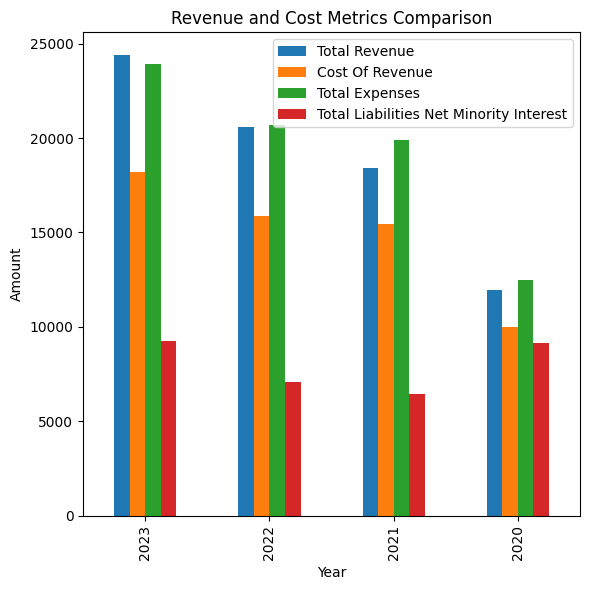

In [16]:
# Plot revenue and cost metrics
result[['Total Revenue', 'Cost Of Revenue', 'Total Expenses','Total Liabilities Net Minority Interest']].plot(kind='bar', figsize=(6,6))
plt.title('Revenue and Cost Metrics Comparison')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

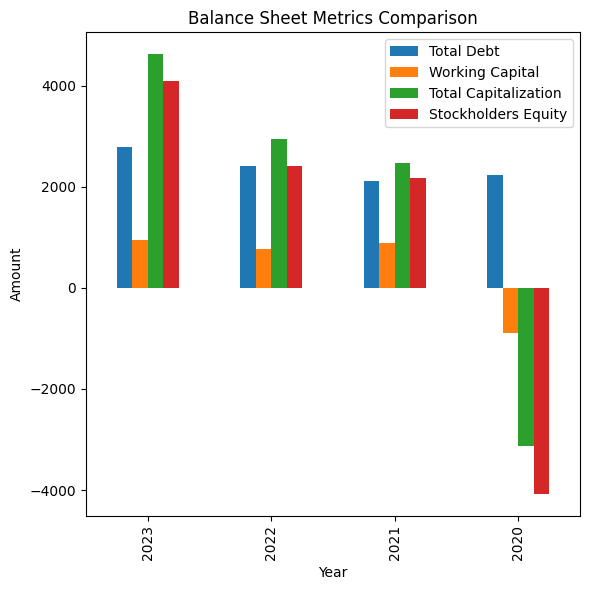

In [17]:
# Plot balance sheet metrics
result[['Total Debt', 'Working Capital', 'Total Capitalization', 'Stockholders Equity']].plot(kind='bar',figsize=(6,6))
plt.title('Balance Sheet Metrics Comparison')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

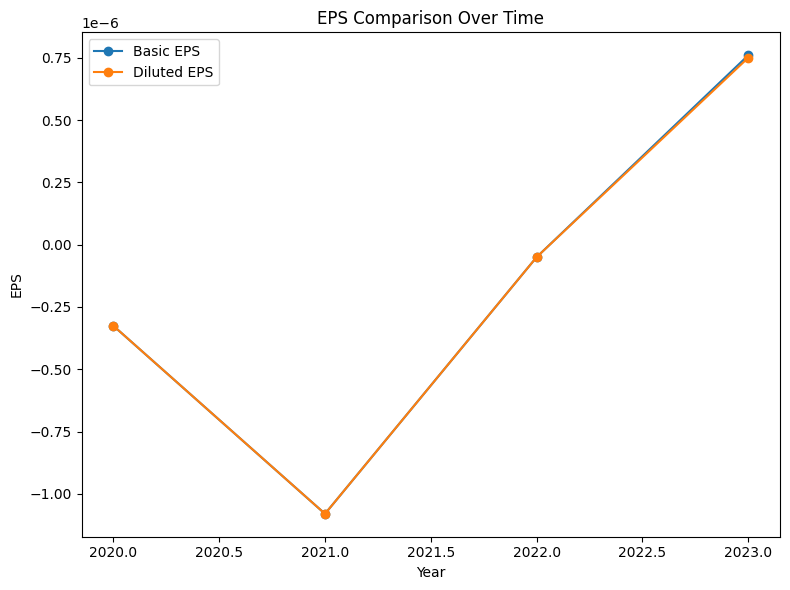

In [19]:
# Plot EPS metrics
result[['Basic EPS', 'Diluted EPS']].plot(kind='line', marker='o',figsize=(8,6))
plt.title('EPS Comparison Over Time')
plt.xlabel('Year')
plt.ylabel('EPS')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

Understanding EPS and Diluted EPS

	1.	Basic EPS (Earnings Per Share):
	•	Definition: Basic EPS is calculated by dividing net income attributable to common shareholders by the weighted average number of common shares outstanding during a period.
	•	Formula:

Basic EPS = (Net Income - Preferred Dividends)/(Weighted Average Shares Outstanding)

	•	Use: Represents the earnings allocated to each share of common stock, not considering any potential dilution.
	2.	Diluted EPS:
	•	Definition: Diluted EPS accounts for all potential dilution from convertible securities (such as convertible bonds, stock options, or warrants) that could convert into common shares.
	•	Formula:

Diluted EPS = (Net Income - Preferred Dividends + Adjustments for Convertible Securities)/(Weighted Average Shares Outstanding + Potential Shares from Conversions)

	•	Use: Provides a more conservative measure of earnings per share by including the potential impact of dilution.

Delta Between Basic EPS and Diluted EPS

	1.	Impact of Convertible Securities:
	•	The delta (difference) between Basic EPS and Diluted EPS reveals the extent to which convertible securities and other potential shares could affect the earnings per share. A significant delta indicates a substantial potential dilution of earnings.
	2.	Investor Insight:
	•	Smaller Delta: A small difference suggests that the impact of potential dilution on earnings per share is minimal. This usually occurs when a company has few convertible securities or stock options.
	•	Larger Delta: A larger difference indicates that the company has significant convertible securities, stock options, or other financial instruments that could substantially dilute EPS if converted.
	3.	Financial Health and Risk:
	•	A larger delta can signal higher financial risk or the possibility of more shares entering the market, which might affect stock valuation and investor sentiment.
	•	It also provides insight into the potential earnings available to shareholders if all potential shares were issued, which can affect future profitability and dividend distribution.

### RATIOS

In [20]:
result['D/E Ratio'] = result['Total Debt'] / result['Stockholders Equity']
result['Net Income'] = result['Total Revenue']-result['Total Expenses']
result['Net Profit Margin'] = result['Net Income'] / result['Total Revenue']
result['ROE'] = result['Net Income'] / result['Stockholders Equity']
result['ROA'] = result['Net Income']/result['Total Assets']
result['Operating Profit Margin'] = result['Net Income Continuous Operations']/result['Operating Expense']
result['Working Capital Per Share'] = result['Working Capital']/ result['Ordinary Shares Number']
result['Total Debt Per Share'] = result['Total Debt']/ result['Ordinary Shares Number']
result['Retained Earnings To Revenue'] = result['Retained Earnings']/ result['Total Revenue']
result['COR To TR'] = result['Cost Of Revenue']/ result['Total Revenue']
result['OPEX To Total Expenses'] = result['Operating Expense']/ result['Total Expenses']
result['Interest Expense To Total Expense'] = result['Interest Expense']/ result['Total Expenses']
result['Operating Income To Opex']= result['Net Income Continuous Operations']/result['Operating Expense']

In [21]:
ratios = result.iloc[:, -13:]
# Print the new DataFrame
ratios.dropna()

,D/E Ratio,Net Income,Net Profit Margin,ROE,ROA,Operating Profit Margin,Working Capital Per Share,Total Debt Per Share,Retained Earnings To Revenue,COR To TR,OPEX To Total Expenses,Interest Expense To Total Expense,Operating Income To Opex
2023,0.681585,473.0,0.019399,0.115676,0.035441,0.237887,0.528953,1.556697,-0.179756,0.746135,0.239105,0.002008,0.237887
2022,0.995029,-112.0,-0.005441,-0.046396,-0.011773,-0.019079,0.432696,1.355066,-0.279017,0.77117,0.233003,0.001305,-0.019079
2021,0.974772,-1494.0,-0.081169,-0.686594,-0.17288,-0.347132,0.508788,1.209131,-0.306993,0.839672,0.223367,0.002261,-0.347132
2020,-0.549077,-515.994,-0.043117,0.126815,-0.101828,-0.185098,-0.522639,1.309018,-0.343262,0.834029,0.200446,0.008632,-0.185098


In [22]:
# Drop the ratios DF columns
result = result.iloc[:, :-13]
result

,Treasury Shares Number,Ordinary Shares Number,Total Debt,Total Liabilities Net Minority Interest,Total Assets,Working Capital,Stockholders Equity,Total Capitalization,Net Tangible Assets,Tangible Book Value,...,Total Revenue,Cost Of Revenue,Gross Profit,Operating Expense,Interest Expense,Total Expenses,Normalized EBITDA,Basic EPS,Diluted EPS,Net Income Continuous Operations
2023,0.000001,1790.328801,2787.000,9257.000,13346.000,947.000,4089.000,4618.000,4089.000,4089.000,...,24383.0,18193.0,6190.0,5717.0,48.0,23910.0,907.0,0.000001,0.000001,1360.0
2022,0.000001,1772.607364,2402.000,7099.000,9513.000,767.000,2414.000,2952.000,2414.000,2414.000,...,20583.0,15873.0,4710.0,4822.0,27.0,20695.0,165.0,-0.0,-0.0,-92.0
2021,0.000001,1754.202657,2121.061,6465.877,8641.834,892.518,2175.957,2459.147,2175.957,2175.957,...,18406.0,15455.0,2951.0,4445.0,45.0,19900.0,-1296.0,-0.000001,-0.000001,-1543.0
2020,0.000001,1706.714142,2234.120,9136.194,5067.332,-891.996,-4068.862,-3125.669,-4073.109,-4073.109,...,11967.339,9981.102,1986.237,2502.231,107.762,12483.333,-379.856,-0.0,-0.0,-463.157


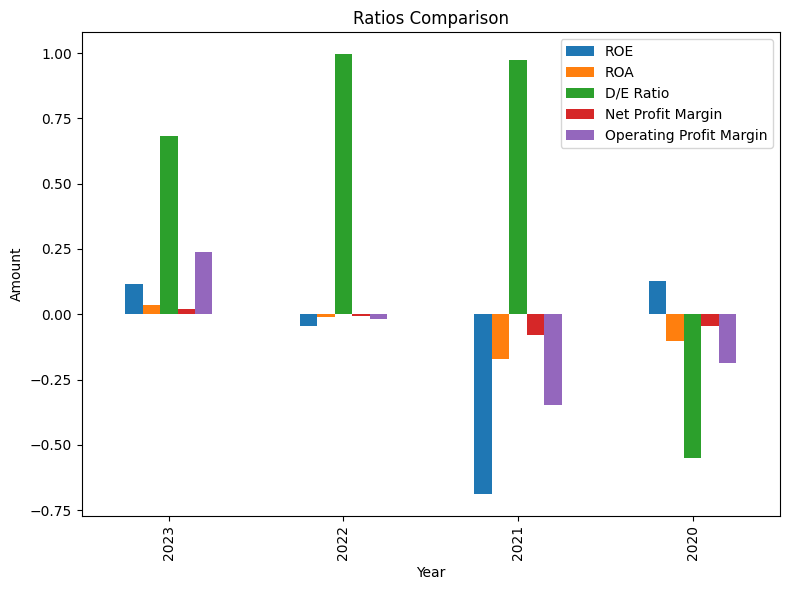

In [24]:
# Plot metrics
ratios[['ROE', 'ROA', 'D/E Ratio', 'Net Profit Margin', 'Operating Profit Margin']].plot(kind='bar',figsize=(8,6))
plt.title('Ratios Comparison')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.legend(loc='best')

plt.tight_layout()
plt.show()

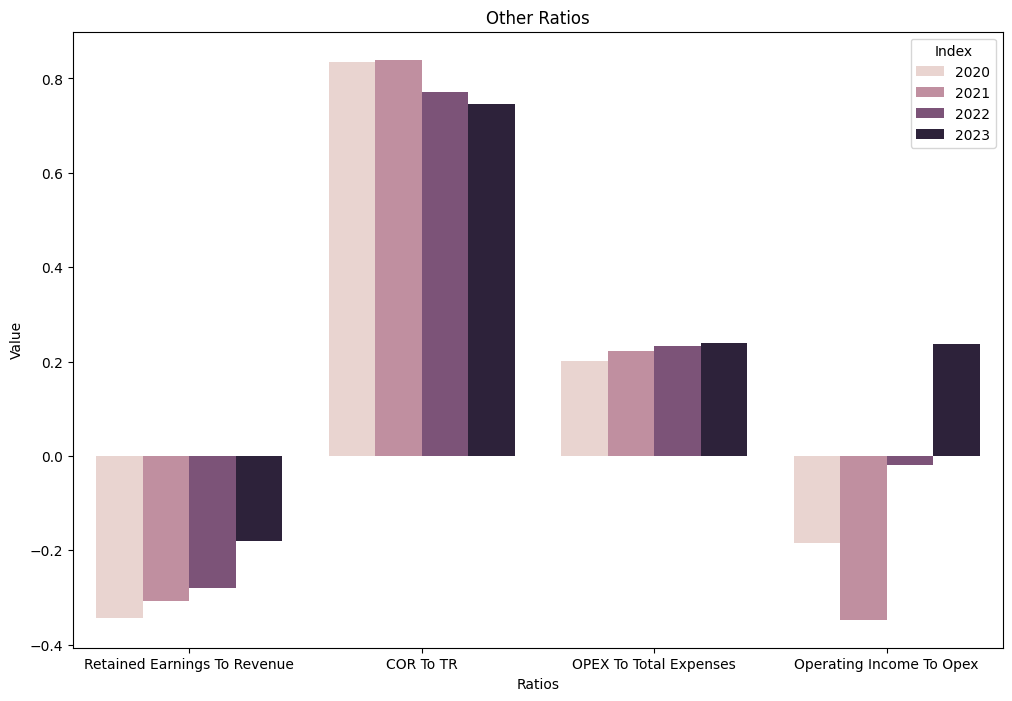

In [25]:
# Plot metrics
# Select the last 5 columns
last_5_columns = ratios.iloc[:, -5:]

# Drop the second to last column
last_5_columns_skipped = last_5_columns.drop(last_5_columns.columns[-2], axis=1)

# Melt the DataFrame for seaborn
df_melted = last_5_columns_skipped.reset_index().melt(id_vars='index', var_name='Column', value_name='Value')

# Plot using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(data=df_melted, x='Column', y='Value', hue='index')

plt.xlabel('Ratios')
plt.ylabel('Value')
plt.title('Other Ratios')
plt.legend(title='Index')
plt.show()

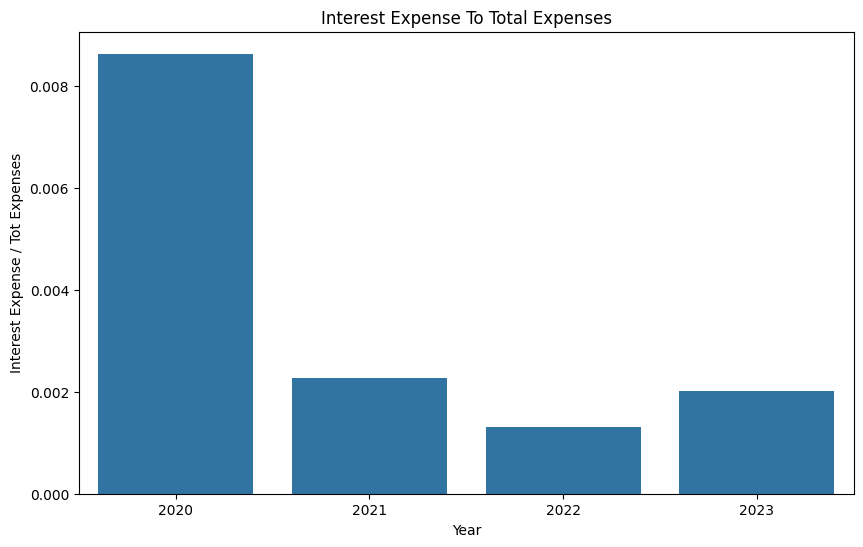

In [172]:
# Select the second to last column
second_to_last_column = ratios.iloc[:, -2]

# Create a DataFrame for plotting
plot_df = pd.DataFrame({
    'Index': ratios.index,
    'Value': second_to_last_column
})

# Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(data=plot_df, x='Index', y='Value')

plt.xlabel('Year')
plt.ylabel('Interest Expense / Tot Expenses')
plt.title('Interest Expense To Total Expenses')
plt.show()

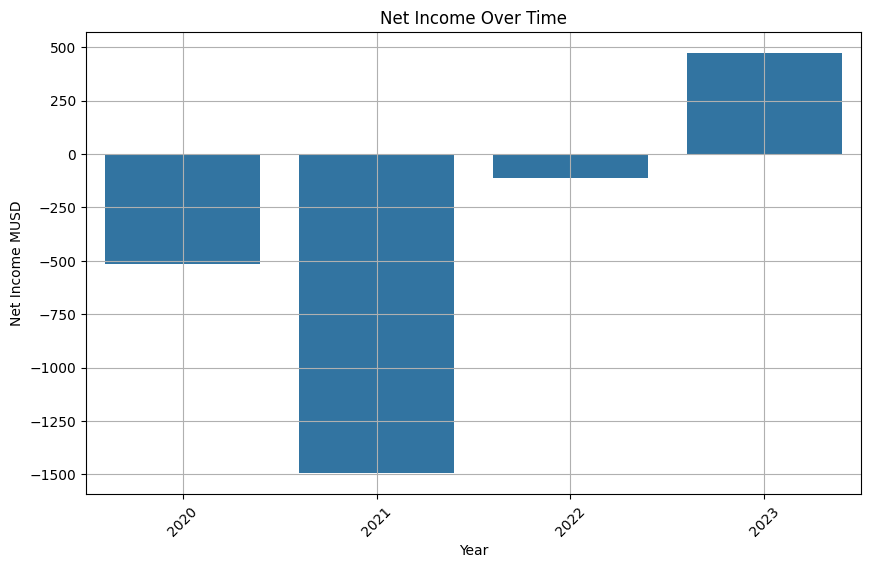

In [174]:
ratios_reset = ratios.reset_index()

# Ensure 'Net Income' and index column exist
if 'Net Income' in ratios_reset.columns and 'index' in ratios_reset.columns:
    plt.figure(figsize=(10, 6))
    sns.barplot(x='index', y='Net Income', data=ratios_reset)
    plt.title('Net Income Over Time')
    plt.xlabel('Year')  
    plt.ylabel('Net Income MUSD')
    plt.xticks(rotation=45)  
    plt.grid(True)
    plt.show()
else:
    print("Net Income column or index column not found in the DataFrame.")